In [1]:
import networkx as nx
from Experiments import log_progress, draw_matrix
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline
from big_clam import BigClam
from big_clam_gamma import BigClamGamma

In [2]:
adj = np.loadtxt('../data/weighted/FemaleLiver-Data/data_adj')
adj2 = np.loadtxt('../data/weighted/FemaleLiver-Data/data')

In [3]:
print adj.mean()
print adj.shape
print
print adj2.mean()
print adj2.shape

0.00580716396067
(3600L, 3600L)

0.00997301282714
(3600L, 3600L)


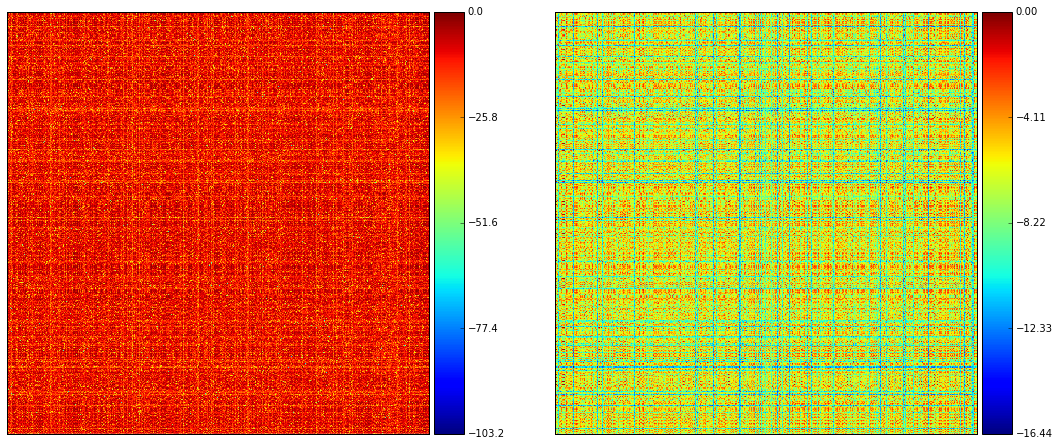

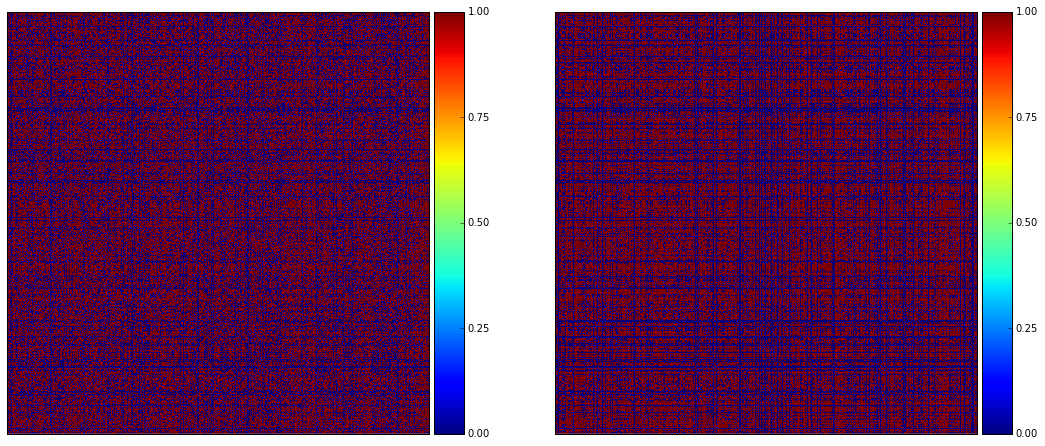

In [4]:
plt.figure(figsize=(18,10))
plt.subplot(121)
draw_matrix(np.log(adj))
plt.subplot(122)
draw_matrix(np.log(adj2))

plt.figure(figsize=(18,10))
plt.subplot(121)
draw_matrix(np.log(adj)>-12)
plt.subplot(122)
draw_matrix(np.log(adj2)>-7)

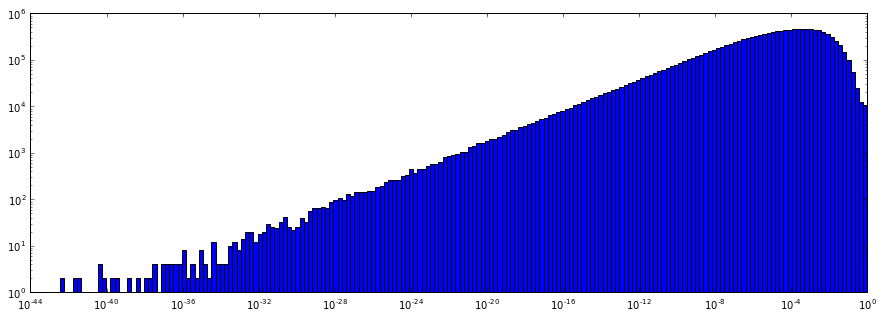

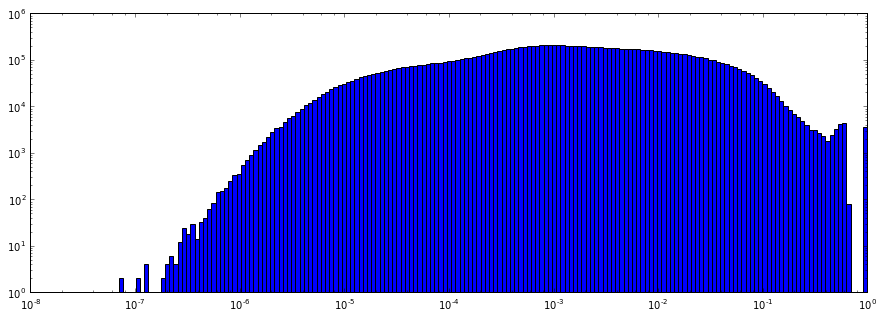

In [5]:
plt.figure(figsize=(15,5))
data = np.reshape(adj, 3600*3600, 1)
pl.hist(data, bins=np.logspace(-44, 0, 200))
pl.gca().set_xscale("log")
pl.gca().set_yscale("log")
pl.show()

plt.figure(figsize=(15,5))
data = np.reshape(adj2, 3600*3600, 1)
pl.hist(data, bins=np.logspace(-8, 0, 200))
pl.gca().set_xscale("log")
pl.gca().set_yscale("log")
pl.show()

In [6]:
params = {
    'initF':'rand', 
    'LLH_output':True, 
    "debug_output":True,
    'iter_output':5000, 
    'processesNo':4, 
    'eps':1e-4,
    "max_iter":500000
}

In [7]:
K = 10
bc = BigClam(1.0 * (adj2 >=  adj2.mean()), K, **params)
bcg = BigClamGamma(10.0 * adj2, K, **params)

In [8]:
F,LLH = bc.fit()

iter: 5000, LLH:-28563008.5397
iter: 10000, LLH:-10240781.9647
iter: 15000, LLH:-5717868.80734
iter: 20000, LLH:-4091307.39657
iter: 25000, LLH:-3374004.21782
iter: 30000, LLH:-3055016.55713
iter: 35000, LLH:-2871077.46507
iter: 40000, LLH:-2752460.02837
iter: 45000, LLH:-2681241.88531
iter: 50000, LLH:-2632685.72107
iter: 55000, LLH:-2606063.04781
iter: 60000, LLH:-2582247.88662
iter: 65000, LLH:-2563942.24883
iter: 70000, LLH:-2546517.47958
iter: 75000, LLH:-2540883.89458


In [9]:
Fg, LLHg = bcg.fit()

iter: 5000, LLH:-1586329284.51
iter: 10000, LLH:-1258781817.84
iter: 15000, LLH:-1018212404.95
iter: 20000, LLH:-831664374.812
iter: 25000, LLH:-682631892.551
iter: 30000, LLH:-565054432.307
iter: 35000, LLH:-468756688.991
iter: 40000, LLH:-391297759.046
iter: 45000, LLH:-328738683.029
iter: 50000, LLH:-277592684.626
iter: 55000, LLH:-236974603.735
iter: 60000, LLH:-202923730.515
iter: 65000, LLH:-175006594.012
iter: 70000, LLH:-152520509.893
iter: 75000, LLH:-133320032.854
iter: 80000, LLH:-117576168.101
iter: 85000, LLH:-104537174.632
iter: 90000, LLH:-93928043.3376
iter: 95000, LLH:-84971524.9609
iter: 100000, LLH:-77785968.7266
iter: 105000, LLH:-71907830.989
iter: 110000, LLH:-67488825.3954
iter: 115000, LLH:-64047825.2442
iter: 120000, LLH:-61512149.1552
iter: 125000, LLH:-59554878.503
iter: 130000, LLH:-58223290.1463
iter: 135000, LLH:-57243050.693
iter: 140000, LLH:-56656892.3885
iter: 145000, LLH:-56229387.5965
iter: 150000, LLH:-55909051.6183
iter: 155000, LLH:-55615346.7306


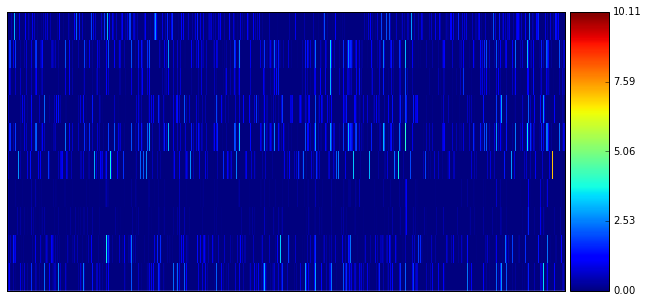

In [11]:
plt.figure(figsize=(15,5))
draw_matrix(F.T)

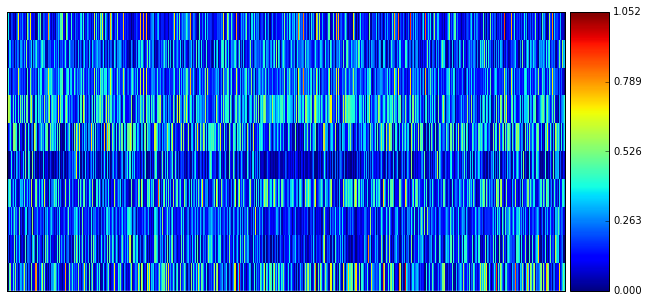

In [12]:
plt.figure(figsize=(15,5))
draw_matrix(Fg.T)

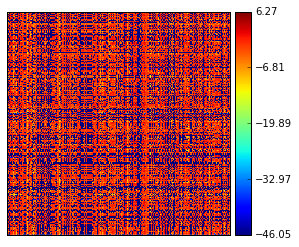

In [20]:
draw_matrix(np.log(F.dot(F.T)+1e-20))

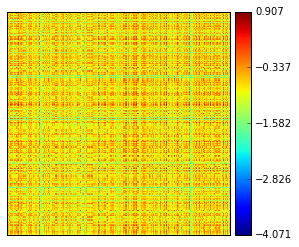

In [17]:
draw_matrix(np.log(Fg.dot(Fg.T)))